In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from createdatas import gaussian_beam
date = str(datetime.date.today())
print(date)

Using TensorFlow backend.


2020-10-27


In [2]:
NOISE = 30
test_num = 100 #データ数
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((test_num, 4))
fit_param_y = np.zeros((test_num, 4))

x = np.zeros((test_num, data_size))
y = np.zeros((test_num, data_size))
_y = np.zeros((test_num, data_size))
tx = np.zeros((test_num, 3))
ty = np.zeros((test_num, 3))

#ガウス関数の動作確認
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0

param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param_ini_y = np.array([i0, y0, w0, h0])
# x配列とy配列
x_array = np.arange(-50, 50, 1.0)                         # x配列
y_array = np.arange(-50, 50, 1.0)                         # y配列
nx = len(x_array)
ny = len(y_array)
intensity = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布

for n in range(test_num):        # 繰り返し精度を調べるために各ノイズ割合でN回実行
    center = data_size/2
    # x配列とy配列
    x_array = np.arange(-center, center, 1.0)                         # x配列
    y_array = np.arange(-center, center, 1.0)                         # y配列
    nx = len(x_array)
    ny = len(y_array)
    intensity = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布
    x0 = x0 + center
    y0 = y0 + center
    for i in range(nx):
        for j in range(ny):
            intensity[i][j] = i0 * np.exp(-2*((i-x0)*(i-x0) + (j-y0)*(j-y0))/w0/w0)
    x0 = x0 - center
    y0 = y0 - center
    # 最大強度を取る位置における強度プロファイル
    profile_x = np.zeros(nx)
    profile_y = np.zeros(ny)
    

    # 2次元の強度分布にノイズを付与
    noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
    noise = noise.reshape((nx,ny))
    intensity_noise = intensity + noise

    # 最大値の探索 & その位置の強度プロファイルの取得
    idx = np.unravel_index(np.argmax(intensity_noise), intensity_noise.shape)
    profile_x= intensity_noise[:,idx[1]]
    profile_y = intensity_noise[idx[0],:]
    profile_y_2 = intensity[idx[0], :]
    x[n] = profile_x
    y[n] = profile_y
    _y[n] = profile_y_2
    tx[n] = (i0, x0 + 1.0, w0)

float64


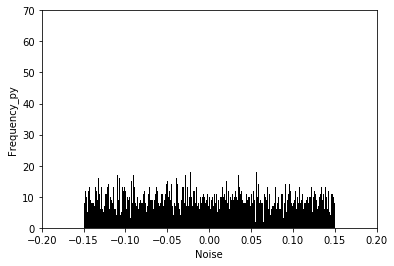

In [10]:
py_noise = (y - _y).flatten()
print(py_noise.dtype)
# ヒストグラムのグラフを作成
plt.figure()
savename = date + "py_noise%d_histogram.png" % (NOISE)
plt.hist(py_noise, bins=1000, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_py')
plt.xlim(-0.2, 0.2)
plt.ylim(0.0, 70.0)
plt.savefig(savename)
plt.show()
plt.close()

In [17]:
test_num = 100 #データ数
data_size = 100 #配列の大きさ

_x = np.zeros((test_num, data_size))
x = np.zeros((test_num, data_size))
test_nums = range(0, test_num)

def _testdata(x, t):    
    for key in test_nums:
        file_path = "/Users/nagaiyuma/Desktop/201027/x_" + str(test_nums[key]) + ".txt"
        with open(file_path) as f:
            file_str = f.read().splitlines()
            f.close

        for i in range(0, data_size):
            x[key][i] = float(file_str[i])

    for key in test_nums:
        file_path = "/Users/nagaiyuma/Desktop/201027/_" + str(test_nums[key]) + ".txt"
        with open(file_path) as f:
            file_str = f.read().splitlines()
            f.close
            
        for i in range(0, data_size):
            _x[key][i] = float(file_str[i])

    return x, _x


_testdata(x, _x)

print(x.shape)
print(_x.shape)

(100, 100)
(100, 100)


float64


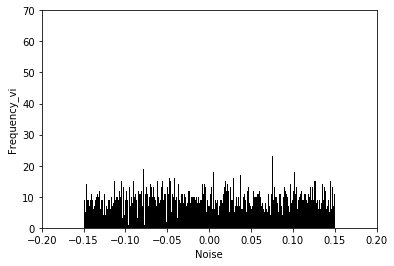

In [18]:
vi_noise = (x - _x).flatten()
print(vi_noise.dtype)
plt.figure()
savename = date + "vi_noise%d_histogram2.png" % (NOISE)
plt.hist(vi_noise, bins=1000, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_vi')
plt.xlim(-0.2, 0.2)
plt.ylim(0.0, 70.0)
plt.savefig(savename)
plt.show()
plt.close()

In [11]:
print(x[0])
print(y[0])

[ 0.101  0.096 -0.136  0.142 -0.127 -0.037  0.087  0.119 -0.132 -0.058
  0.06   0.03   0.102  0.072 -0.092 -0.06  -0.096  0.143  0.038 -0.097
  0.085 -0.129  0.063  0.061 -0.072 -0.013 -0.082 -0.135 -0.028 -0.146
 -0.131  0.098 -0.1    0.011 -0.041 -0.139  0.114  0.118 -0.097 -0.008
 -0.099 -0.134 -0.032  0.077  0.05  -0.007  0.388  0.634  0.632  0.786
  1.04   1.012  0.784  0.584  0.166  0.137  0.175  0.129 -0.1    0.033
 -0.129  0.138  0.084  0.079 -0.128 -0.082  0.083 -0.022  0.048  0.033
 -0.019 -0.038 -0.11   0.094  0.07  -0.056 -0.024 -0.063  0.097  0.015
 -0.009 -0.058 -0.12   0.112  0.049 -0.142  0.075 -0.055 -0.04  -0.022
  0.129  0.002 -0.046 -0.07   0.002  0.03   0.132  0.097 -0.084  0.086]
[-0.02333726  0.03722869 -0.11452179  0.10375292 -0.02405826 -0.03884112
  0.01759723 -0.06275514 -0.06189113 -0.1168431   0.12614378  0.03596088
 -0.12914101 -0.07280864  0.05577504 -0.07882624 -0.14676926  0.12596512
 -0.01216759 -0.09025075  0.07897645 -0.14567124 -0.11198309  0.025925